
**Duration-of-Credit-Month** refers to the length of time (in months) over which the loan or credit is expected to be repaid. This is a common metric in banking and finance that specifies the total duration of the loan agreement, indicating how long the customer has to repay the loan in full.

**Instalment-per-cent**: This value is a percentage that represents the proportion of the borrower's income that will go toward repaying the loan each month. For instance, if a customer earns $1,000 per month and the loan instalment is $200, the "Instalment-per-cent" would be 20%.




In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.style as style
import seaborn as sns

import sklearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_columns',None)

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score


In [156]:
df = pd.read_excel(r"C:\Users\lily\Desktop\IT alapok privát\PRIV DATA SC 1204\Machine learning\Creditworthiness\train_credit-data.xlsx")

In [157]:
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,NaN,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,NaN,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,NaN,1-4 yrs,2,NaN,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,NaN,1-4 yrs,1,NaN,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,NaN,< 1yr,4,NaN,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               202 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         43 non-null     object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

In [159]:
df.isnull().sum()/len(df)

Credit-Application-Result            0.000
Account-Balance                      0.000
Duration-of-Credit-Month             0.000
Payment-Status-of-Previous-Credit    0.000
Purpose                              0.000
Credit-Amount                        0.000
Value-Savings-Stocks                 0.596
Length-of-current-employment         0.000
Instalment-per-cent                  0.000
Guarantors                           0.914
Duration-in-Current-address          0.688
Most-valuable-available-asset        0.000
Age-years                            0.024
Concurrent-Credits                   0.000
Type-of-apartment                    0.000
No-of-Credits-at-this-Bank           0.000
Occupation                           0.000
No-of-dependents                     0.000
Telephone                            0.000
Foreign-Worker                       0.000
dtype: float64

*Comment: Missing values in the columns of: Value-Savings-Stocks, Guarantors, Duration-in-Current-address, Age-years.Age years can be interpolated, but the rest has too high amount of missing data, therefore to be dropped.*
*Also to be noted - several feature encoding will be needed.*

In [160]:
df.columns

Index(['Credit-Application-Result', 'Account-Balance',
       'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit',
       'Purpose', 'Credit-Amount', 'Value-Savings-Stocks',
       'Length-of-current-employment', 'Instalment-per-cent', 'Guarantors',
       'Duration-in-Current-address', 'Most-valuable-available-asset',
       'Age-years', 'Concurrent-Credits', 'Type-of-apartment',
       'No-of-Credits-at-this-Bank', 'Occupation', 'No-of-dependents',
       'Telephone', 'Foreign-Worker'],
      dtype='object')

In [161]:
df = df.drop(['Value-Savings-Stocks', 'Guarantors', 'Duration-in-Current-address'], axis=1)

### EDA

#### Target variable

In [162]:
def setup_plot():
    plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
    plt.xticks(rotation=40)
    plt.gcf().set_size_inches(5, 3)  

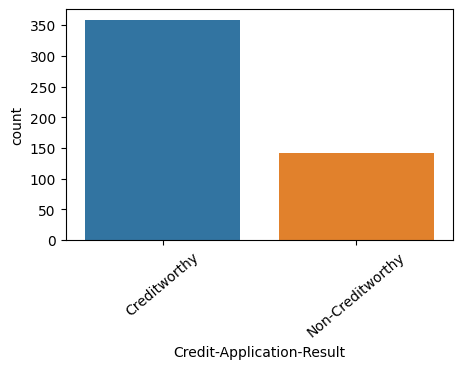

In [163]:
sns.countplot(df, x=df['Credit-Application-Result'])
setup_plot()

*Comment: The dataset is imbalanced.*

#### Numerical variables

In [164]:
num = df.select_dtypes(include=np.number).columns
num

Index(['Duration-of-Credit-Month', 'Credit-Amount', 'Instalment-per-cent',
       'Most-valuable-available-asset', 'Age-years', 'Type-of-apartment',
       'Occupation', 'No-of-dependents', 'Telephone', 'Foreign-Worker'],
      dtype='object')

*Comment: Credit-Amount to be checked separately.*

In [165]:
num = num.drop('Credit-Amount')

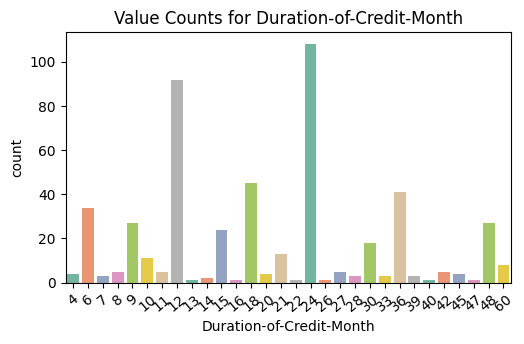

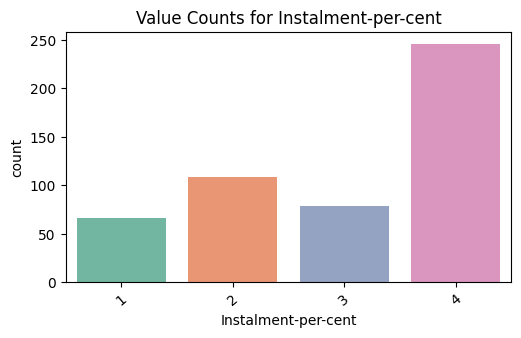

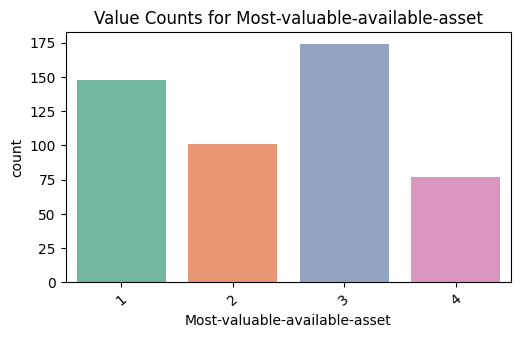

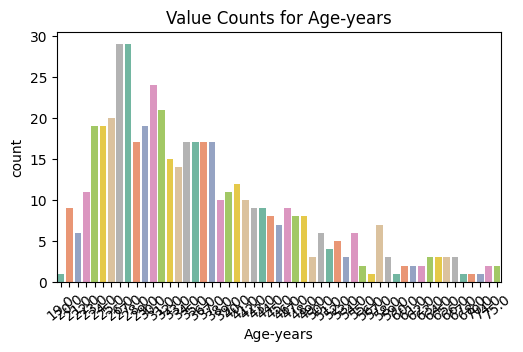

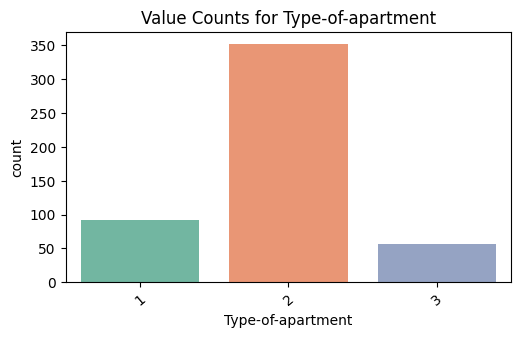

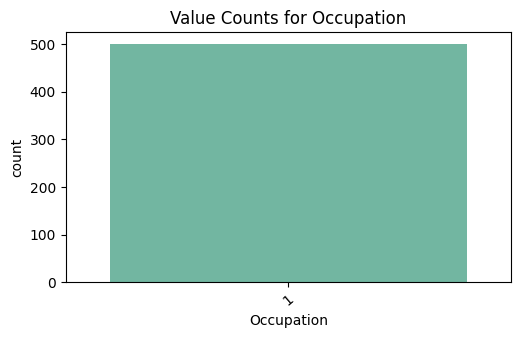

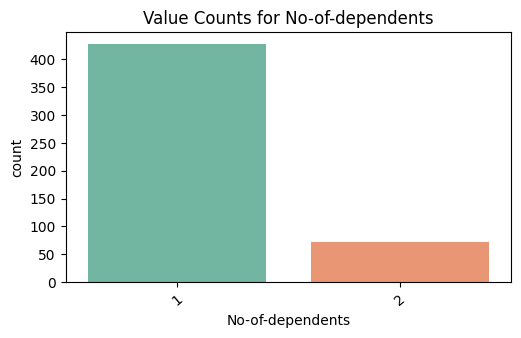

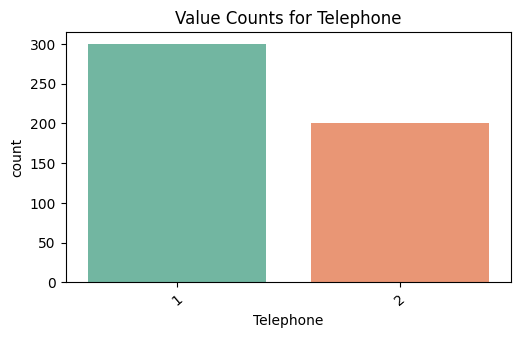

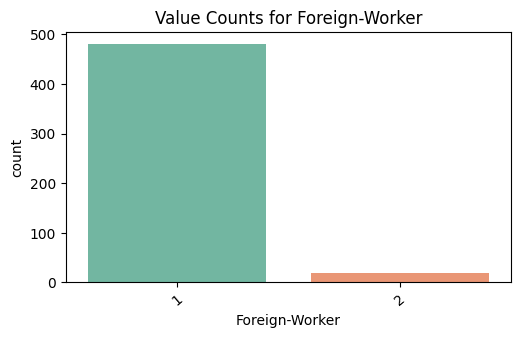

In [166]:
for col in num:
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Value Counts for {col}')
    plt.tight_layout(pad=0.5)
    setup_plot()
    plt.show()

*Comment: Age to be checked separately, Occupation and Phone number can be dropped.*

In [167]:
df = df.drop(['Occupation', 'Telephone'], axis=1)

*Note: The most popular repayment period is 12 and 24 months, however there are some which are for 6,9,15,18,36,48 are quite common as well.*
*The rest of the features are rather categorical value, not numerical.*

*To be encoded: 'Instalment-per-cent', 'Most-valuable-available-asset','Type-of-apartment', 'No-of-dependents', 'Foreign-Worker'.*

##### Credit Amount

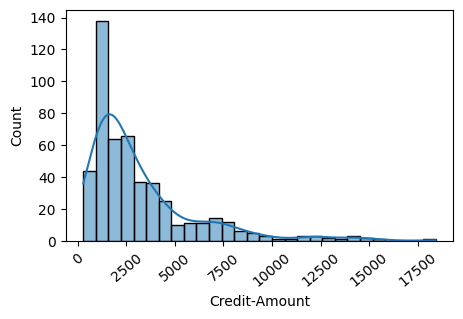

In [168]:
sns.histplot(data= df, x=df['Credit-Amount'], kde=True)
setup_plot()

*Comment: Based on the amount and the duration, these loans are mainly short term loans - majority as of less than 2 years with low credit amount - majority less than 5000.*

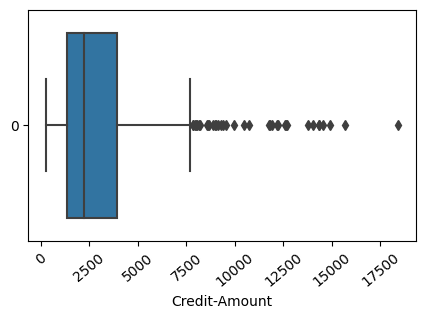

In [169]:
sns.boxplot(data= df, x=df['Credit-Amount'])
setup_plot()

*Comment: There are some outliers, but considering the amount of obersation points(500 rows), might not be worth to dropped.*

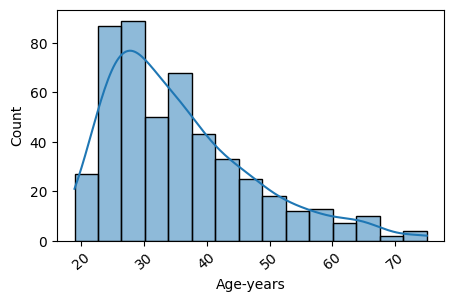

In [170]:
sns.histplot(data=df, x=df['Age-years'], kde=True)
setup_plot()

*Comment: This type of loan is popular among mainly peoople in their thirties and forties.*

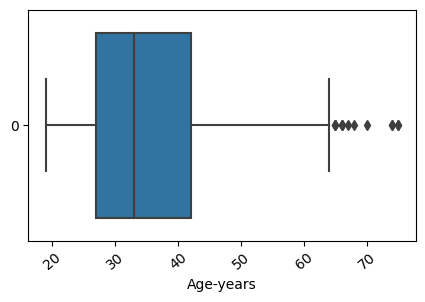

In [171]:
sns.boxplot(data=df, x=df['Age-years'])
setup_plot()

*Comment: same as for Credit Amount.*

#### Object variables

In [172]:
obj = df.select_dtypes(include='object').columns
obj

Index(['Credit-Application-Result', 'Account-Balance',
       'Payment-Status-of-Previous-Credit', 'Purpose',
       'Length-of-current-employment', 'Concurrent-Credits',
       'No-of-Credits-at-this-Bank'],
      dtype='object')

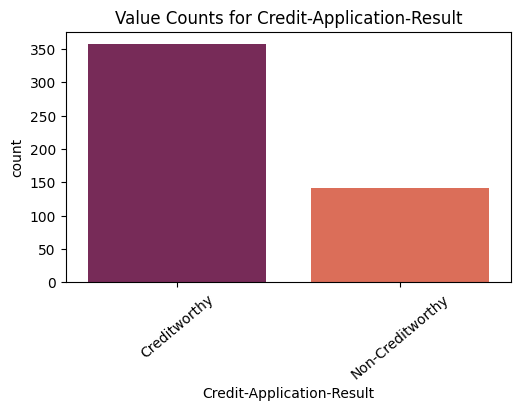

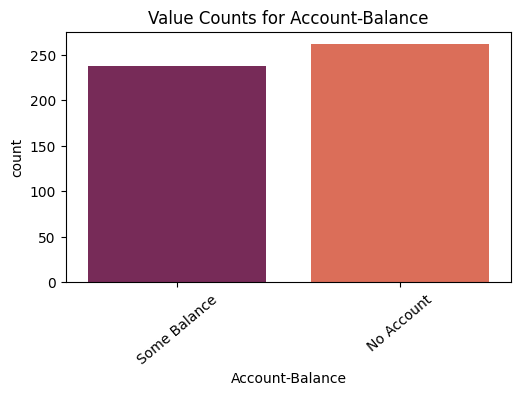

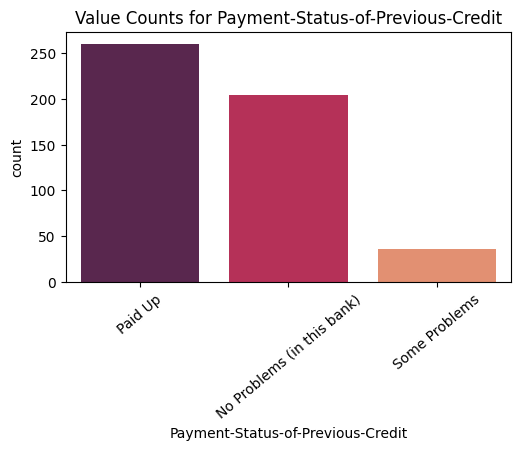

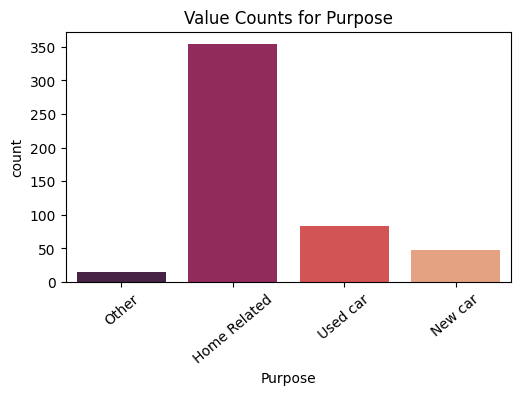

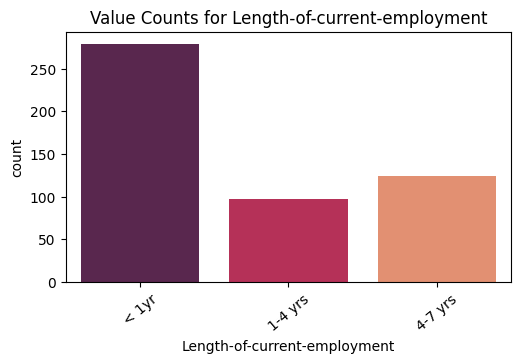

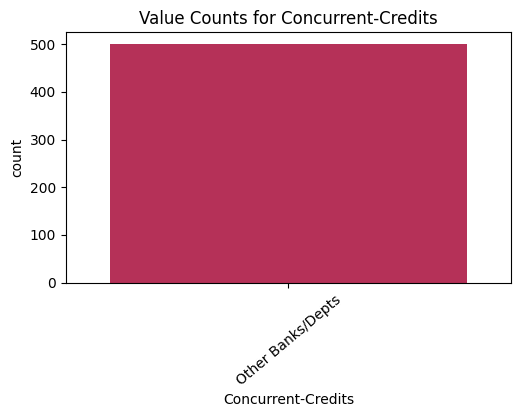

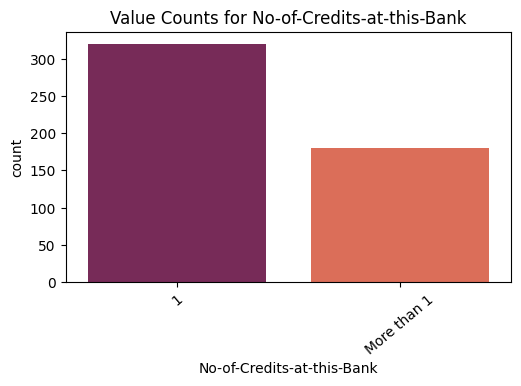

In [173]:
for col in obj:
    sns.countplot(data=df, x=col, palette="rocket")
    plt.title(f'Value Counts for {col}')
    plt.tight_layout(pad=0.5)
    setup_plot()
    plt.show()

*Comment: Concurrent credit can be dropped.*

In [174]:
df.columns

Index(['Credit-Application-Result', 'Account-Balance',
       'Duration-of-Credit-Month', 'Payment-Status-of-Previous-Credit',
       'Purpose', 'Credit-Amount', 'Length-of-current-employment',
       'Instalment-per-cent', 'Most-valuable-available-asset', 'Age-years',
       'Concurrent-Credits', 'Type-of-apartment', 'No-of-Credits-at-this-Bank',
       'No-of-dependents', 'Foreign-Worker'],
      dtype='object')

In [175]:
df = df.drop('Concurrent-Credits', axis=1)

#### Encoding

*In some cases the order hierarchy matters and in other features - it does not have relevancy, therefore I will execute label encoding and one hot encoding as well.*

In [176]:
dum = ['Purpose']

In [177]:
lab = ['Account-Balance', 'Payment-Status-of-Previous-Credit', 
          'Length-of-current-employment', 'Instalment-per-cent', 'Most-valuable-available-asset', 
          'Type-of-apartment', 'No-of-Credits-at-this-Bank','No-of-dependents', 'Foreign-Worker', 'Credit-Application-Result']

In [178]:
df = pd.get_dummies(df, columns=['Purpose'],drop_first = True)

In [179]:
df['Purpose_New car'] = df['Purpose_New car'].astype(int)
df['Purpose_Other'] = df['Purpose_Other'].astype(int)
df['Purpose_Used car'] = df['Purpose_Used car'].astype(int)

In [180]:
label = LabelEncoder()

In [181]:
for col in lab:
    df[col] = label.fit_transform(df[col])
    df[col] = df[col].astype(int)

In [182]:
df.head()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Credit-Amount,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,No-of-dependents,Foreign-Worker,Purpose_New car,Purpose_Other,Purpose_Used car
0,0,1,4,1,1494,2,0,0,NaN,1,0,1,1,0,1,0
1,0,1,4,1,1494,2,0,0,29.0,1,0,1,1,0,0,0
2,0,1,4,0,1544,0,1,0,42.0,1,1,1,0,0,0,0
3,0,1,4,0,3380,0,0,0,37.0,1,0,1,0,0,0,0
4,0,0,6,1,343,2,3,0,27.0,1,0,0,0,0,0,0


*Comment: Data needs to be scaled.*

#### Missin values

In [183]:
df['Age-years'].describe()

count    488.000000
mean      35.637295
std       11.501522
min       19.000000
25%       27.000000
50%       33.000000
75%       42.000000
max       75.000000
Name: Age-years, dtype: float64

In [184]:
median_age = df['Age-years'].median()

In [185]:
df['Age-years'].fillna(median_age, inplace=True)

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    int32  
 1   Account-Balance                    500 non-null    int32  
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    int32  
 4   Credit-Amount                      500 non-null    int64  
 5   Length-of-current-employment       500 non-null    int32  
 6   Instalment-per-cent                500 non-null    int32  
 7   Most-valuable-available-asset      500 non-null    int32  
 8   Age-years                          500 non-null    float64
 9   Type-of-apartment                  500 non-null    int32  
 10  No-of-Credits-at-this-Bank         500 non-null    int32  
 11  No-of-dependents                   500 non-null    int32  

In [187]:
df.describe()

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Credit-Amount,Length-of-current-employment,Instalment-per-cent,Most-valuable-available-asset,Age-years,Type-of-apartment,No-of-Credits-at-this-Bank,No-of-dependents,Foreign-Worker,Purpose_New car,Purpose_Other,Purpose_Used car
count,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,0.284000,0.476000,21.43400,0.664000,3199.980000,1.364000,2.010000,1.360000,35.574000,0.928000,0.360000,0.14600,0.038000,0.094000,0.030000,0.166000
std,0.451388,0.499924,12.30742,0.606498,2831.386861,0.787874,1.113724,1.064268,11.369567,0.539814,0.480481,0.35346,0.191388,0.292121,0.170758,0.372453
min,0.000000,0.000000,4.00000,0.000000,276.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,12.00000,0.000000,1357.250000,1.000000,1.000000,0.000000,27.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,18.00000,1.000000,2236.500000,2.000000,2.000000,2.000000,33.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,24.00000,1.000000,3941.500000,2.000000,3.000000,2.000000,41.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,60.00000,2.000000,18424.000000,2.000000,3.000000,3.000000,75.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


### Data modelling

In [188]:
X = df.drop('Credit-Application-Result', axis=1)
y = df['Credit-Application-Result']

#### Splitting - stratify due to imbalanced

In [191]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,stratify = y,random_state = 0)

*Note: Will check the accuracy to understand how well the model generalize, however the final metric will be ROC-AUC since the dataset is imbalanced.*

##### Decision Tree

In [196]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
dtree_ypred = dtree.predict(X_test)
print('train accuracy: {:.2f}'.format(dtree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(dtree.score(X_test,y_test)))

train accuracy: 1.00
test accuracy: 0.73


*Hyperparameter Tuning*

In [199]:
dtree = dtree = DecisionTreeClassifier(random_state=42)

In [198]:
param_grid = {
    'max_features': [3,5,7,10],
    'max_leaf_nodes':[3,5,7,10]
}

In [202]:
grid_dtree = GridSearchCV(dtree, param_grid = param_grid, cv=5)
grid_dtree.fit(X_train,y_train)

print('Best cross-validation acuracy: {:.2f}'.format(grid_dtree.best_score_))
print('Best test score: {:.2f}'.format(grid_dtree.score(X_test,y_test)))
print('Best parameters:',grid_dtree.best_params_)

Best cross-validation acuracy: 0.76
Best test score: 0.72
Best parameters: {'max_features': 7, 'max_leaf_nodes': 5}


In [204]:
dtree = DecisionTreeClassifier(max_features=7,max_leaf_nodes=5,random_state=42)

dtree.fit(X_train,y_train)
dtree_ypred = dtree.predict(X_test)

print('train accuracy: {:.2f}'.format(dtree.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(dtree.score(X_test,y_test)))

train accuracy: 0.78
test accuracy: 0.72


##### Logistic Regression

In [244]:
lreg = LogisticRegression(random_state=42)
lreg.fit(X_train, y_train)
lreg_ypred = lreg.predict(X_test)
print('train accuracy: {:.2f}'.format(lreg.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(lreg.score(X_test,y_test)))

train accuracy: 0.77
test accuracy: 0.72


In [209]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [210]:
grid_lreg = GridSearchCV(lreg, param_grid, cv=5)
grid_lreg .fit(X_train,y_train)
print('Best cross-validation acuracy: {:.2f}'.format(grid_lreg.best_score_))
print('Best test score: {:.2f}'.format(grid_lreg.score(X_test,y_test)))
print('Best parameters:',grid_lreg.best_params_)

Best cross-validation acuracy: 0.74
Best test score: 0.72
Best parameters: {'C': 1}


In [220]:
lreg = LogisticRegression(C=1, random_state=42)
lreg.fit(X_train, y_train)
lreg_ypred = lreg.predict(X_test)
print('train accuracy: {:.2f}'.format(lreg.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(lreg.score(X_test,y_test)))

train accuracy: 0.77
test accuracy: 0.72


##### SVC

In [245]:
SVC_model = SVC()
SVC_model.fit(X_train, y_train)
SVC_model_ypred = SVC_model.predict(X_test)
print('train accuracy: {:.2f}'.format(SVC_model.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(SVC_model.score(X_test,y_test)))

train accuracy: 0.74
test accuracy: 0.72


In [216]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC())
])

param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

SVC_grid = GridSearchCV(pipeline, param_grid, cv=5)
SVC_grid = SVC_grid.fit(X_train,y_train)

print('train score: {:.2f}'.format(SVC_grid.score(X_train,y_train)))
print('test score: {:.2f}'.format(SVC_grid.score(X_test,y_test)))
print('Best parameters:',SVC_grid.best_params_)

train score: 0.81
test score: 0.70
Best parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


In [248]:
SVC_model = SVC(probability=True,C=1, gamma='scale', kernel='linear') # probabilty is needed for ROC-AUC
SVC_model.fit(X_train, y_train)
SVC_model_ypred = SVC_model.predict(X_test)
print('train accuracy: {:.2f}'.format(SVC_model.score(X_train,y_train)))
print('test accuracy: {:.2f}'.format(SVC_model.score(X_test,y_test)))

train accuracy: 0.75
test accuracy: 0.72


##### Random Forest

In [217]:
rfc = RandomForestClassifier(random_state = 42)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))

train score: 1.00
test score: 0.76


In [222]:
rfc = RandomForestClassifier(random_state = 42)

param_grid = {
    'max_features': [3,5,7,10],
    'max_leaf_nodes':[3,5,7,10]
}

grid_rfc = GridSearchCV(rfc, param_grid = param_grid,cv =5)
grid_rfc.fit(X_train,y_train)

print('Best cross-validation acuracy: {:.2f}'.format(grid_rfc.best_score_))
print('Best test score: {:.2f}'.format(grid_rfc.score(X_test,y_test)))
print('Best parameters:',grid_rfc.best_params_)


Best cross-validation acuracy: 0.77
Best test score: 0.74
Best parameters: {'max_features': 10, 'max_leaf_nodes': 5}


In [225]:
rfc = RandomForestClassifier(max_features=10,max_leaf_nodes=5,random_state = 42)
rfc.fit(X_train,y_train)
print('train score: {:.2f}'.format(rfc.score(X_train,y_train)))
print('test score: {:.2f}'.format(rfc.score(X_test,y_test)))
rfc_ypred = rfc.predict(X_test)

train score: 0.81
test score: 0.74


*Note: As expected RandomForest generalizes the best among these models.*

In [234]:
rfc.feature_importances_

array([0.26837341, 0.13644143, 0.20563604, 0.20997395, 0.04418157,
       0.0078211 , 0.06500814, 0.04474377, 0.00456156, 0.        ,
       0.00822313, 0.        , 0.00244527, 0.        , 0.00259063])

In [235]:
Feature_importance = pd.DataFrame({'Features':X_train.columns,'Importance':rfc.feature_importances_})

In [236]:
Feature_importance = Feature_importance.sort_values(by = 'Importance',ascending = False)

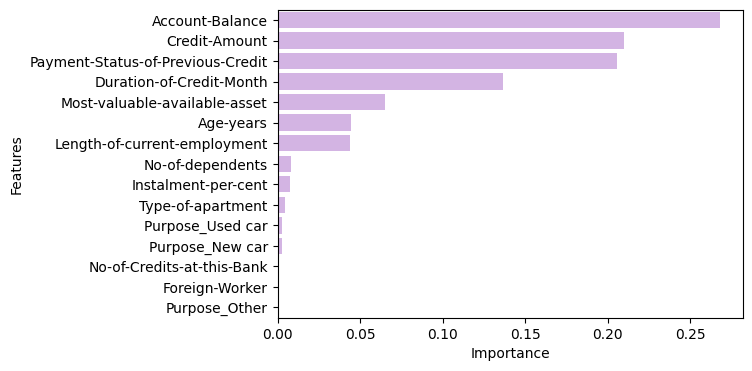

In [241]:
plt.figure(figsize=(6,4))
sns.barplot(x='Importance',y='Features',data = Feature_importance, color = 'darkorchid',alpha = 0.4)
plt.show()

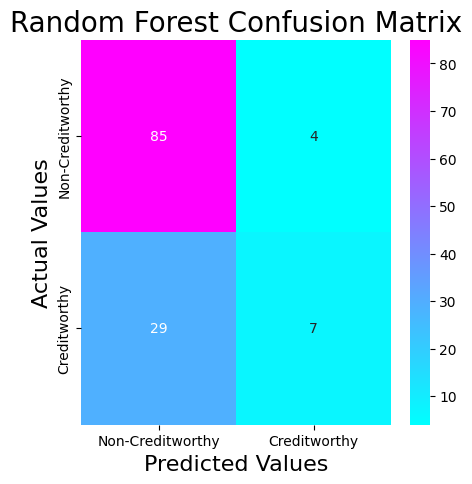

In [233]:
confusion = confusion_matrix(y_test, rfc_ypred)
plt.figure(figsize=(5,5))

sns.heatmap(confusion, annot=True, fmt='d', cmap='cool', 
            xticklabels=['Non-Creditworthy', 'Creditworthy'], 
            yticklabels=['Non-Creditworthy', 'Creditworthy'])

plt.title('Random Forest Confusion Matrix', fontsize=20)
plt.xlabel('Predicted Values', fontsize=16)
plt.ylabel('Actual Values', fontsize=16)

plt.show()

### Final metric: ROC-AUC

In [249]:
pred_prob_dct = dtree.predict_proba(X_test)
pred_prob_lgr = lreg.predict_proba(X_test)
pred_prob_svc = SVC_model.predict_proba(X_test)
pred_prob_rfc = rfc.predict_proba(X_test)


fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_dct[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_lgr[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_svc[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_rfc[:,1], pos_label=1)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

<Figure size 1000x600 with 0 Axes>

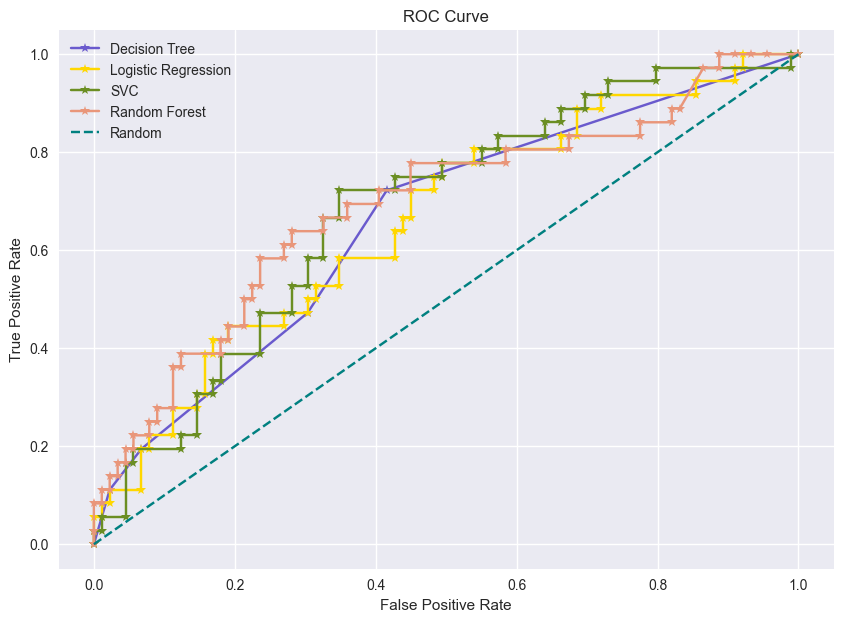

In [252]:
plt.style.use('seaborn')
plt.figure(figsize=(10,6))

plt.figure(figsize=(10, 7))
plt.plot(fpr1, tpr1, marker='*', color='slateblue', label='Decision Tree')
plt.plot(fpr2, tpr2, marker='*', color='gold', label='Logistic Regression')
plt.plot(fpr3, tpr3, marker='*', color='olivedrab',  label='SVC')
plt.plot(fpr4, tpr4, marker='*', color='darksalmon', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='teal', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [254]:
fpr1, tpr1, _ = roc_curve(y_test, pred_prob_dct[:, 1], pos_label=1)
fpr2, tpr2, _ = roc_curve(y_test, pred_prob_lgr[:, 1], pos_label=1)
fpr3, tpr3, _ = roc_curve(y_test, pred_prob_svc[:, 1], pos_label=1)
fpr4, tpr4, _ = roc_curve(y_test, pred_prob_rfc[:, 1], pos_label=1)

auc_dct = auc(fpr1, tpr1)
auc_lgr = auc(fpr2, tpr2)
auc_svc = auc(fpr3, tpr3)
auc_rfc = auc(fpr4, tpr4)

print('AUC score for Decision Tree: {:.2f}'.format(auc_dct))
print('AUC score for Logistic Regression: {:.2f}'.format(auc_lgr))
print('AUC score for SVC: {:.2f}'.format(auc_svc))
print('AUC score for Random Forest: {:.2f}'.format(auc_rfc))

AUC score for Decision Tree: 0.66
AUC score for Logistic Regression: 0.66
AUC score for SVC: 0.68
AUC score for Random Forest: 0.69
